**I-DATASET IMPORTING**

In [131]:
#question 1
import pandas as pd


data = pd.read_csv('WHR2024.csv',encoding='latin1')

print(data)

     Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008        3.724               7.350           0.451   
1     Afghanistan  2009        4.402               7.509           0.552   
2     Afghanistan  2010        4.758               7.614           0.539   
3     Afghanistan  2011        3.832               7.581           0.521   
4     Afghanistan  2012        3.783               7.661           0.521   
...           ...   ...          ...                 ...             ...   
2340     Zimbabwe  2019        2.694               7.698           0.759   
2341     Zimbabwe  2020        3.160               7.596           0.717   
2342     Zimbabwe  2021        3.155               7.657           0.685   
2343     Zimbabwe  2022        3.296               7.670           0.666   
2344     Zimbabwe  2023        3.572               7.679           0.694   

      Healthy life expectancy at birth  Freedom to make life choices  \
0              

**II-Data Cleaning and Preprocessing**


In [132]:
#question1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2345 non-null   object 
 1   year                              2345 non-null   int64  
 2   Life Ladder                       2345 non-null   float64
 3   Log GDP per capita                2317 non-null   float64
 4   Social support                    2332 non-null   float64
 5   Healthy life expectancy at birth  2282 non-null   float64
 6   Freedom to make life choices      2309 non-null   float64
 7   Generosity                        2265 non-null   float64
 8   Perceptions of corruption         2220 non-null   float64
 9   Positive affect                   2321 non-null   float64
 10  Negative affect                   2329 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 201.7+ KB


In [133]:
#question 2
unique_countries = data['Country name'].nunique()
print(unique_countries)


164


In [134]:
#question 3

missing_values = data.isnull().sum()

# Fill missing values by the mean value of corresponding columns
data.fillna(data.mean(numeric_only=True), inplace=True)

# print data without missing values
print("Missing values after filling:\n ",data.isnull().sum())


Missing values after filling:
  Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64


In [135]:
#question 4

#check for outliers

def detect_outliers(data):
    outliers = {}
    for column in data.select_dtypes(include="number").columns:
        Q1 = data[column].quantile(0.25)  # First quartile
        Q3 = data[column].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identify outliers
        outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Get outliers for each numeric column
outliers = detect_outliers(data)

# Display the outliers
for column, outlier_data in outliers.items():
    print(f"Outliers in column '{column}':")
    print(outlier_data)
    print("-" * 50)

# Save all outliers to a CSV file (optional)
outliers_combined = pd.concat(outliers.values(), ignore_index=True)
outliers_combined.to_csv("outliers_detected.csv", index=False)
print("Outliers saved to 'outliers_detected.csv'")

Outliers in column 'year':
Empty DataFrame
Columns: [Country name, year, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect]
Index: []
--------------------------------------------------
Outliers in column 'Life Ladder':
   Country name  year  Life Ladder  Log GDP per capita  Social support  \
13  Afghanistan  2022        1.281            9.390857           0.228   
14  Afghanistan  2023        1.446            9.390857           0.368   

    Healthy life expectancy at birth  Freedom to make life choices  \
13                            54.875                         0.368   
14                            55.200                         0.228   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  
13    -0.00068                      0.733            0.206            0.576  
14    -0.00068                      0.738            0.2

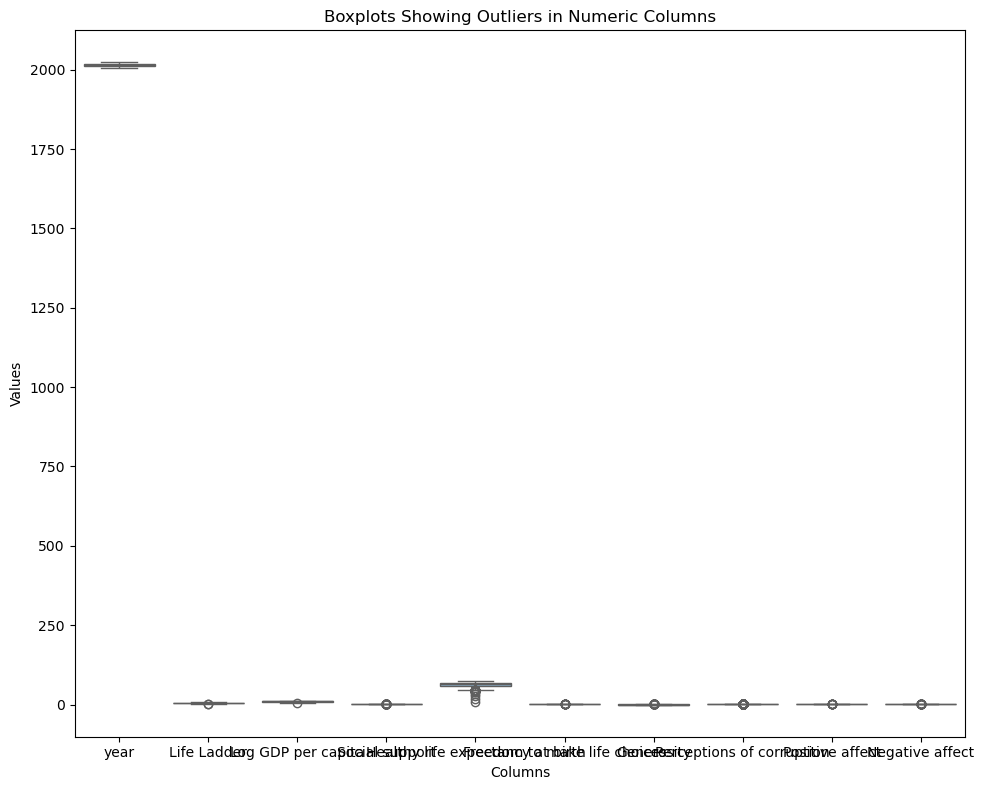

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create blotplox
plt.figure(figsize=(10, 8))

sns.boxplot(data=data[numeric_columns], orient='v', palette="Set3")

# Set labels and title
plt.ylabel('Values')
plt.xlabel('Columns')
plt.title('Boxplots Showing Outliers in Numeric Columns')

# Show the plot
plt.tight_layout()
plt.show()


In [137]:
# Create a copy of the data
data_cleaned = data.copy()

for col in numeric_columns:
    # Calculate bounds
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows outside the bounds
    data_cleaned = data_cleaned[(data_cleaned[col] >= lower_bound) & (data_cleaned[col] <= upper_bound)]

print(f"Original data shape: {data.shape}")
print(f"Data shape after removing outliers: {data_cleaned.shape}")

Original data shape: (2345, 11)
Data shape after removing outliers: (1966, 11)


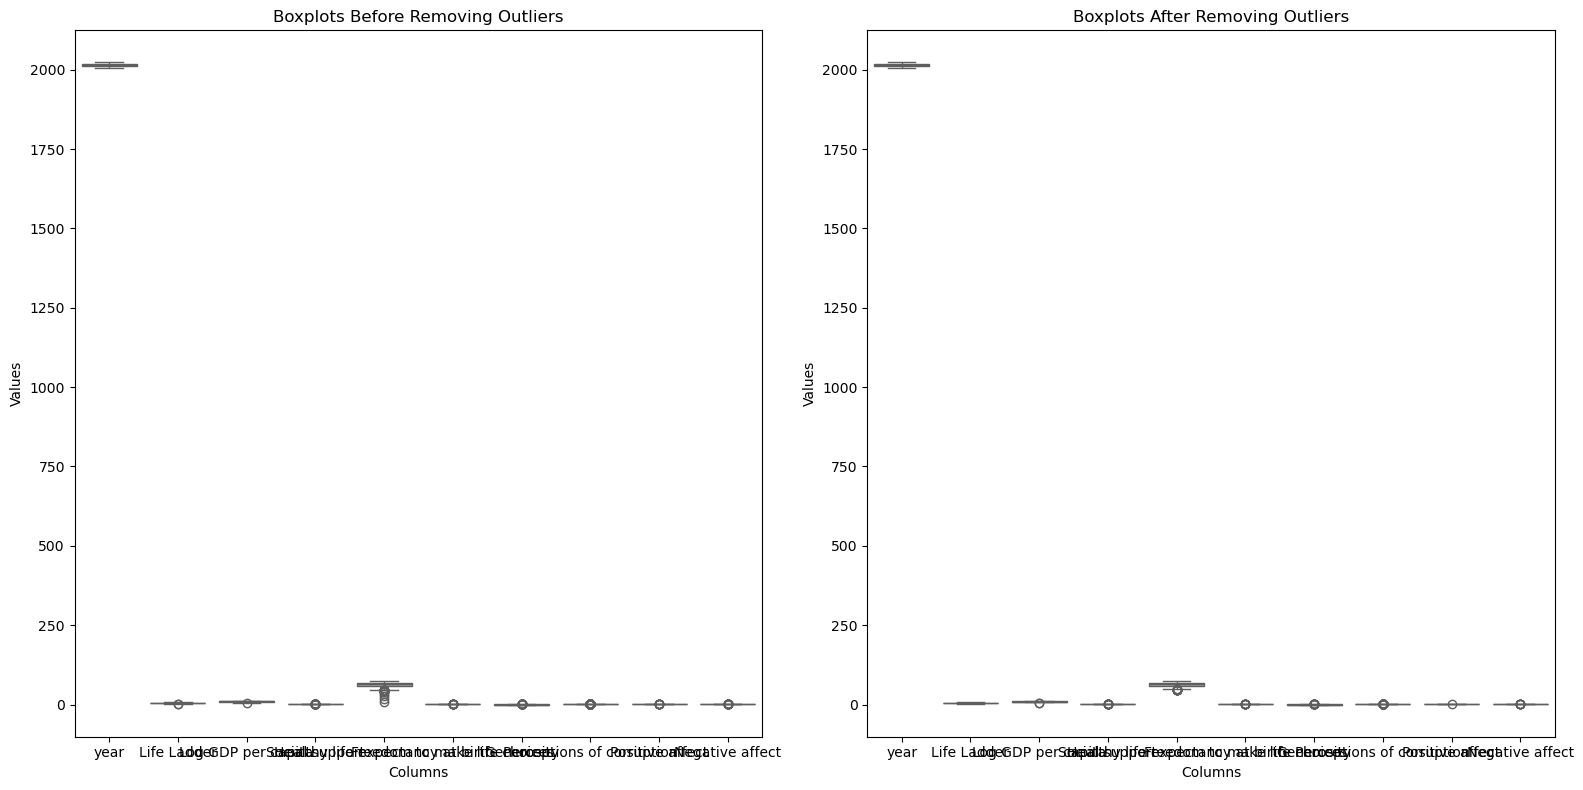

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
plt.figure(figsize=(16, 8))

# Plot boxplot for the original dataset
plt.subplot(1, 2, 1)
sns.boxplot(data=data[numeric_columns], orient='v', palette="Set3")
plt.title('Boxplots Before Removing Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')

# Plot boxplot for the cleaned dataset
plt.subplot(1, 2, 2)
sns.boxplot(data=data_cleaned[numeric_columns], orient='v', palette="Set3")
plt.title('Boxplots After Removing Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


**III-DATA GROUPING AND FITLTERING**


In [139]:
#QUESTION 1 

grouped_data = data.groupby('year')

#group data with 2021,2022,2023
group_2021 = grouped_data.get_group(2021)
group_2022 = grouped_data.get_group(2022)
group_2023 = grouped_data.get_group(2023)

print(group_2021)


     Country name  year  Life Ladder  Log GDP per capita  Social support  \
12    Afghanistan  2021        2.436            7.325000           0.454   
28        Albania  2021        5.255            9.588000           0.702   
40        Algeria  2021        5.217            9.308000           0.841   
61      Argentina  2021        5.908            9.977000           0.882   
78        Armenia  2021        5.301            9.561000           0.762   
...           ...   ...          ...                 ...             ...   
2257   Uzbekistan  2021        6.185            8.962000           0.896   
2275    Venezuela  2021        5.108            9.390857           0.812   
2293      Vietnam  2021        5.540            9.271000           0.799   
2324       Zambia  2021        3.082            8.082000           0.619   
2342     Zimbabwe  2021        3.155            7.657000           0.685   

      Healthy life expectancy at birth  Freedom to make life choices  \
12             

In [140]:
#question 2 filtering

group_2021_filtered = group_2021[group_2021['Life Ladder'] > 7.00].sort_values(by='Life Ladder', ascending=False)
group_2022_filtered = group_2022[group_2022['Life Ladder'] > 7.00].sort_values(by='Life Ladder', ascending=False)
group_2023_filtered = group_2023[group_2023['Life Ladder'] > 7.00].sort_values(by='Life Ladder', ascending=False)

# Print the filtered and sorted groups
print(group_2021_filtered)


     Country name  year  Life Ladder  Log GDP per capita  Social support  \
678       Finland  2021        7.794              10.794           0.970   
554       Denmark  2021        7.699              10.968           0.945   
884       Iceland  2021        7.565              10.878           0.980   
1984       Sweden  2021        7.439              10.893           0.932   
1574       Norway  2021        7.362              11.096           0.948   
1997  Switzerland  2021        7.328              11.158           0.934   
1478  Netherlands  2021        7.314              10.944           0.919   
1495  New Zealand  2021        7.137              10.693           0.950   
95      Australia  2021        7.112              10.815           0.920   
111       Austria  2021        7.080              10.899           0.863   

      Healthy life expectancy at birth  Freedom to make life choices  \
678                              71.15                         0.963   
554                

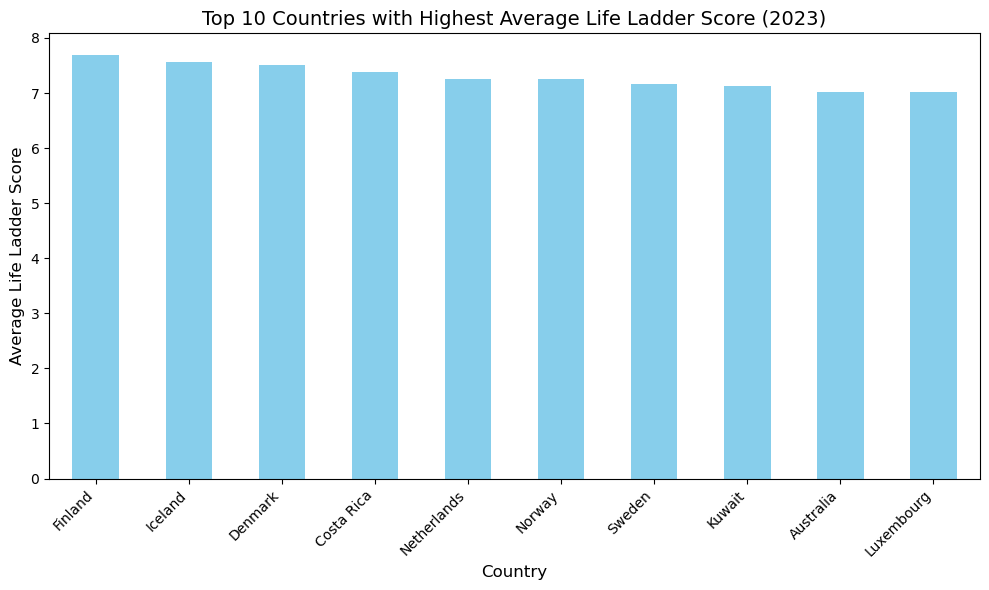

In [141]:


# calculating average of life ladder for 2023 year for all countries 
avg_life_ladder_2023 = group_2023.groupby('Country name')['Life Ladder'].mean()

top_10_countries_in_2023 = avg_life_ladder_2023.sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_countries_in_2023.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Top 10 Countries with Highest Average Life Ladder Score (2023)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Life Ladder Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


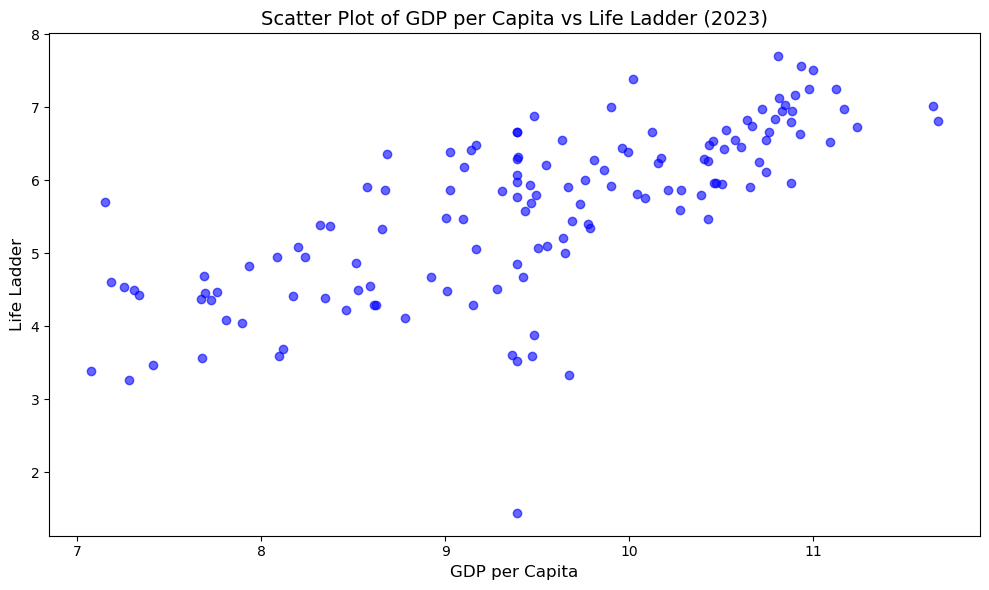

In [142]:
#question 4 

# Create a scatter plot for GDP per capita vs Life Ladder
plt.figure(figsize=(10, 6))
plt.scatter(group_2023['Log GDP per capita'], group_2023['Life Ladder'], color='blue', alpha=0.6)

# Add labels and title
plt.title('Scatter Plot of GDP per Capita vs Life Ladder (2023)', fontsize=14)
plt.xlabel('GDP per Capita', fontsize=12)
plt.ylabel('Life Ladder', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**IV- EXPLORATORY DATA ANALYSIS (EDA)**

In [143]:
#question 1

#calculate the descriptive statistics measure with describe() method
desc_stats = data.describe()

# Display the descriptive statistics
print(desc_stats)

              year  Life Ladder  Log GDP per capita  Social support  \
count  2345.000000  2345.000000         2345.000000     2345.000000   
mean   2014.765885     5.470093            9.390857        0.808595   
std       5.058382     1.119058            1.145235        0.120990   
min    2005.000000     1.281000            5.527000        0.228000   
25%    2011.000000     4.640000            8.510000        0.744000   
50%    2015.000000     5.436000            9.479000        0.832000   
75%    2019.000000     6.296000           10.362000        0.903000   
max    2023.000000     8.019000           11.676000        0.987000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       2345.000000                   2345.000000   
mean                          63.334796                      0.750396   
std                            6.735079                      0.138656   
min                            6.720000                      0.22800

In [144]:
#question 2

# Assuming your dataset is stored in 'data'
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Now you can calculate the correlation matrix on the numeric data
correlation_matrix = numeric_data.corr()



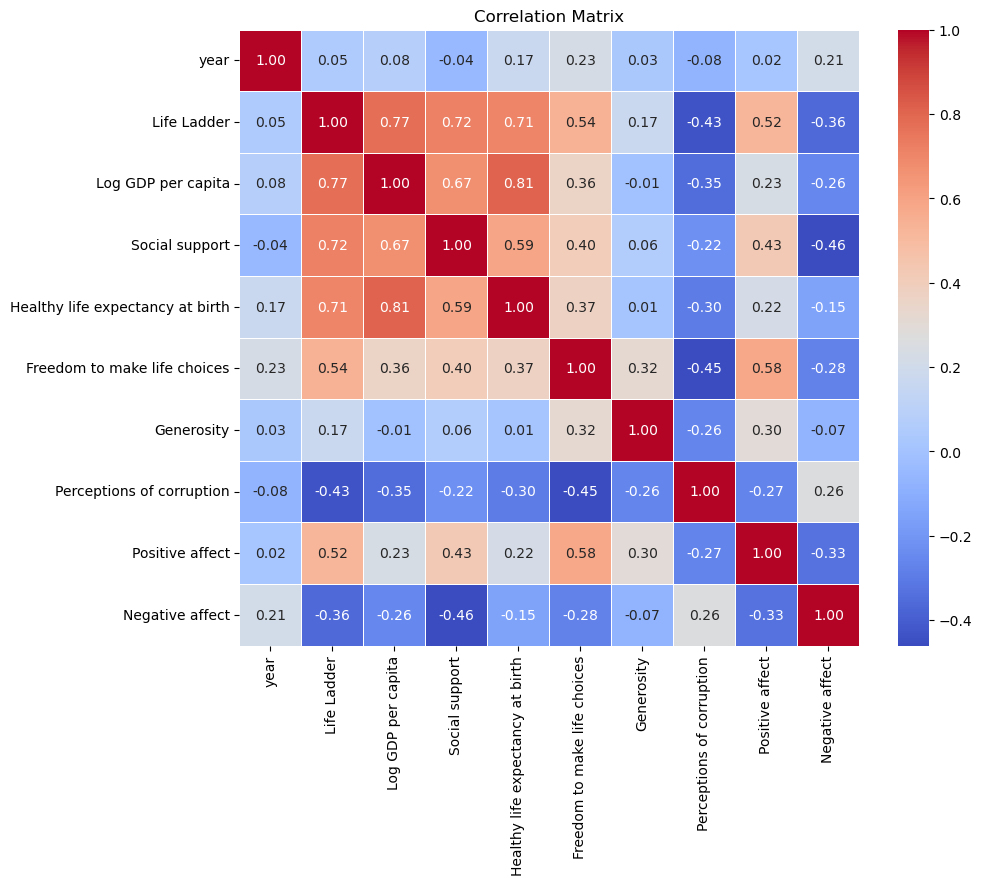

In [145]:
#question3 

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**V-Data Exporting**

In [146]:
#question1 

#export to excel file with three sheets

with pd.ExcelWriter('grouped_data.xlsx') as writer:
    group_2021.to_excel(writer, sheet_name='2021', index=False)
    group_2022.to_excel(writer, sheet_name='2022', index=False)
    group_2023.to_excel(writer, sheet_name='2023', index=False)


In [147]:
#question 2 

#export to sql with three tables 

from sqlalchemy import create_engine
engine = create_engine('sqlite:///grouped_data.sql')  # This will create a SQLite database file

# Export each group to a separate table in the database
group_2021.to_sql('group_2021', engine, index=False, if_exists='replace')
group_2022.to_sql('group_2022', engine, index=False, if_exists='replace')
group_2023.to_sql('group_2023', engine, index=False, if_exists='replace')

137

In [148]:
#question 3 

#import xlsx and print it 

excel_data = pd.ExcelFile('grouped_data.xlsx')

if len(excel_data.sheet_names) == 3:
    print("The file contains 3 sheets:", excel_data.sheet_names)
else:
    print("The file does not contain 3 sheets. It contains:", len(excel_data.sheet_names), "sheets:", excel_data.sheet_names)

The file contains 3 sheets: ['2021', '2022', '2023']


In [149]:
import re

# Specify the path to your .sql file
sql_file_path = 'grouped_data.sql'

# Try opening the file with a different encoding and handle errors
try:
    with open(sql_file_path, 'r', encoding='utf-8', errors='ignore') as f:
        sql_content = f.read()
except UnicodeDecodeError:
    print("Unicode decode error. The file might not be in UTF-8 encoding.")

# Use a regular expression to find all CREATE TABLE statements (case-insensitive)
create_table_statements = re.findall(r'CREATE\s+TABLE\s+`?(\w+)`?', sql_content, re.IGNORECASE)

# Check if there are exactly 3 tables
if len(create_table_statements) == 3:
    print("The SQL file contains 3 tables:", create_table_statements)
else:
    print(f"The SQL file does not contain 3 tables. It contains {len(create_table_statements)} tables:", create_table_statements)


The SQL file contains 3 tables: ['group_2023', 'group_2022', 'group_2021']
